# Coding Project - Watermark

I first implemented the basic requirements, for every white pixels of the watermark, I print it in the center of the image as a white pixel.
The result is saved in result1.jpg.

Then, I made a function where we can choose the coordinates x and y for the watermark, as well as the opacity, which is a float between 0 and 1. This function called watermark takes the image, its watermark, the coordinates x&y and the opacity as parameters and returns the image watermarked.
If the float or the coordinates are not well encoded, an error is printed.
For every white pixels of the watermark, if the opacity is 1 we rewrite the pixels as white in the image, else we blend the two images. To do that, I took (1-opacity) percentage of the original image and added a percentage equal to opacity of the watermark.


(900, 1200, 3) 1 255 uint8
0 255


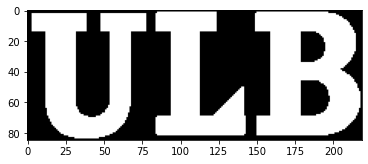

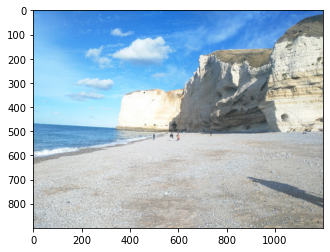

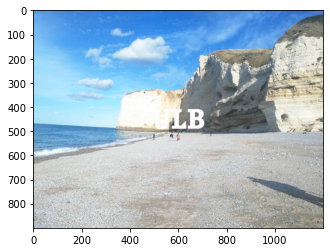

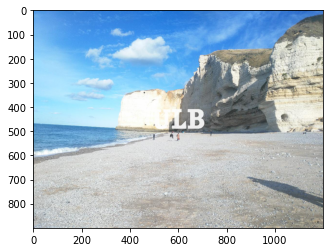

In [17]:
from skimage.io import imread,imsave,imshow
from skimage import data
from skimage import color
from skimage.color import rgb2hsv
# Importing Image module from PIL package 
import numpy as np
from numpy import uint8
from matplotlib import pyplot as plt


im = imread("etretat.jpg")
image = imread("watermark.png")
cop = im.copy()
# checking if the max is 255
print(im.shape, im.min(), im.max(), im.dtype)
print(image.min(),image.max())
plt.imshow(image,cmap=plt.cm.gray)
plt.show()
plt.imshow(im)
plt.show()
plt.show()


for i in range (image.shape[0]):
    for j in range(image.shape[1]):
        if (image[i,j]==255):
           cop[int(im.shape[0]/2)-int(image.shape[0]/2)+i,int(im.shape[1]/2)-int(image.shape[1]/2)+j] = [255,255,255]
imsave('result1.jpg', cop)
result1 = imread("result1.jpg")
plt.imshow(result1)
plt.show()


def watermark(image,background,coordx, coordy,opacity):
    if(opacity>1 or opacity<0):
        print("Error, opacity should be a float between 0 and 1")
    elif (coordx>image.shape[0] or coordy>image.shape[1]):
        print("Error, the coordinates must be in the image")
    else:        
        for i in range (image.shape[0]):
            for j in range(image.shape[1]):
                if (image[i,j]==255):
                    if(opacity==1):
                        background[coordx-int(image.shape[0]/2)+i,coordy-int(image.shape[1]/2)+j]=[255,255,255]
                    else:
                        background[coordx-int(image.shape[0]/2)+i,coordy-int(image.shape[1]/2)+j]=((1-opacity)*background[coordx-int(image.shape[0]/2)+i,coordy-int(image.shape[1]/2)+j]+(opacity*image[i,j]))

    return background

toshow=watermark(image,im,int(im.shape[0]/2),int(im.shape[1]/2),0.9)

imsave('result.jpg', toshow)
result = imread("result.jpg")
plt.imshow(result)
plt.show()
